The essential libraries and the dataset are imported in the first lines of code.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df= pd.read_csv("/workspaces/Predicting-Hypertension-/Hypertension_Cleaned.csv")
df=df.drop('Unnamed: 0', axis=1)# delete unwanted index column
df= df.drop('Risk', axis=1) # delete the binary risk column
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Hyp_stage
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,Normal
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,Stage 1 Hypertension
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,Stage 1 Hypertension
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,Stage 2 Hypertension
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,Stage 1 Hypertension
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,Stage 1 Hypertension
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,Stage 1 Hypertension
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,Stage 2 Hypertension


Secondly the model is split into X features and y labels. After that the data is split into training and testing sets using train_test_split function.The Random Forest algorithm is indifferent to scaling but it is still done in this scenario to help with reducing over-fitting.

In [24]:
X=df.drop('Hyp_stage',axis=1)
y=df['Hyp_stage']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


To create the heart of the model , the RandomForestClassifier() is imported and prepared for wrapping in a GridSearchCV meta-estimator that will find the best performing parameters for the machine learning algorithm. The GridSearchCV() estimator is given the following parameters to handle:

- n_estimators ; the number of Decision trees in the Random Forest
- max_features ; the number of features to be used when finding the best split at each node in a decision tree
- min_samples_leaf ; the minimum number of sample required on a leaf node
- min_samples_split; the minimum number of samples needed to split an internal node
- max_depth; the maximum depth on a decision tree
- bootstrap; whether to use bootstrapped samples on each tree

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

Param_grid = {
    'n_estimators': [100, 200],  
    'max_features': ['sqrt', 'log2', None],  
    'min_samples_leaf': [4, 6, 8],  
    'min_samples_split': [5, 10, 15],  
    'max_depth': [None, 10, 20],  
    'bootstrap': [True]
}


An instance of the grid search is used to fit the random forest classifier to training data with 5-fold cross validation.

In [27]:
rfc_gs_model = GridSearchCV(RFC,param_grid= Param_grid, cv=5, scoring='accuracy')
rfc_gs_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

Predications are then made using the best parameters found using grid search estimator, creating the array of predicted labels, y_pred.

In [28]:
best_model = rfc_gs_model.best_estimator_
y_pred = best_model.predict(scaled_X_test)
y_pred

array(['Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Stage 2 Hypertension',
       'Stage 1 Hypertension', 'Normal', 'Stage 2 Hypertension', 'Normal',
       'Stage 2 Hypertension', 'Normal', 'Stage 2 Hypertension',
       'Hypertensive Crisis', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Stage 1 Hypertension', 'Stage 1 Hypertension', 'Normal',
       'Stage 2 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Normal', 'Normal', 'Stage 2 Hypertension',
       'Normal', 'Stage 1 Hypertension', 'Normal', 'Normal',
       'Stage 2 Hypertension', 'Elevated', 'Stage 1 Hypertension',
       'Elevated', 'Stage 1 Hypertension', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Stage 2 Hypertension', 'Normal', 'Normal',
       'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Normal',
 

In [29]:
best_model

RandomForestClassifier(max_features=None, min_samples_leaf=4,
                       min_samples_split=5)

The evaluation is started by importing and applying evaluation metrics from Scikit learn namely accuracy score, confusion matrix and classification report.

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
accuracy= accuracy_score(y_test,y_pred)
accuracy
print ("The accuracy of the model is :{0}%" .format(accuracy*100))

The accuracy of the model is :100.0%


The classification report showing performance per class and in the overall dataset.

In [31]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

            Elevated       1.00      1.00      1.00        80
 Hypertensive Crisis       1.00      1.00      1.00        33
              Normal       1.00      1.00      1.00       224
Stage 1 Hypertension       1.00      1.00      1.00       250
Stage 2 Hypertension       1.00      1.00      1.00       261

            accuracy                           1.00       848
           macro avg       1.00      1.00      1.00       848
        weighted avg       1.00      1.00      1.00       848



The confusion matrix is used to compare the predictions to the actual values.

In [32]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 80,   0,   0,   0,   0],
       [  0,  33,   0,   0,   0],
       [  0,   0, 224,   0,   0],
       [  0,   0,   0, 250,   0],
       [  0,   0,   0,   0, 261]])

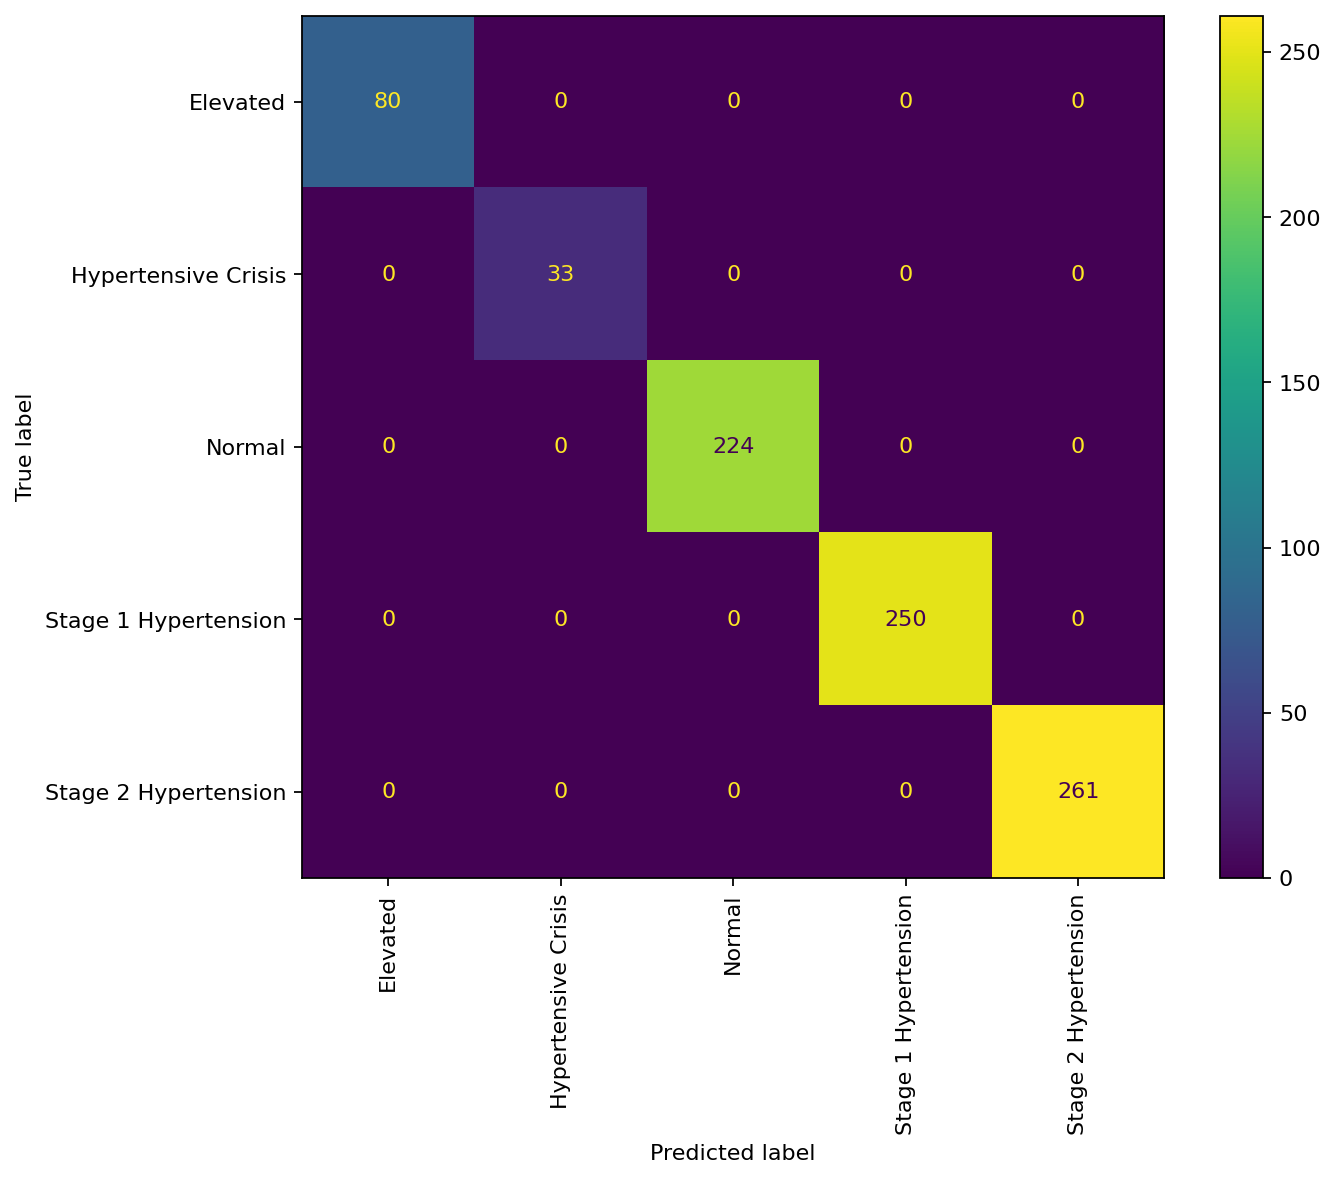

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_gs_model.classes_)
fig, ax = plt.subplots(figsize=(9, 7), dpi=160)
disp.plot(ax=ax)
plt.xticks(rotation=90)
plt.show()

The Receiver Operator Characteristic curve is used to compare any difference in classification performance through comparing the True positive and False Negative rates. The models ROC curve shows 100 % Area under Curve values denoting an over-fitting issue.

In [34]:
from sklearn.metrics import RocCurveDisplay
roc_auc= RocCurveDisplay

In [35]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(6, 6)):
    # use decision_function or predict_proba depending on model
    try:
        y_score = clf.decision_function(X_test)
    except AttributeError:
        y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # convert true labels to binary matrix
    y_test_bin = pd.get_dummies(y_test, drop_first=False).values

    # compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curves
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Multiclass ROC Curve')

    # stage names
    stage_names = ['Elevated', 'Hypertensive Crisis', 'Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension']

    # plot each ROC curve
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i],
                label=f'ROC curve (area = {roc_auc[i]:.2f}) for {stage_names[i]}')
    
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    sns.despine()
    plt.show()


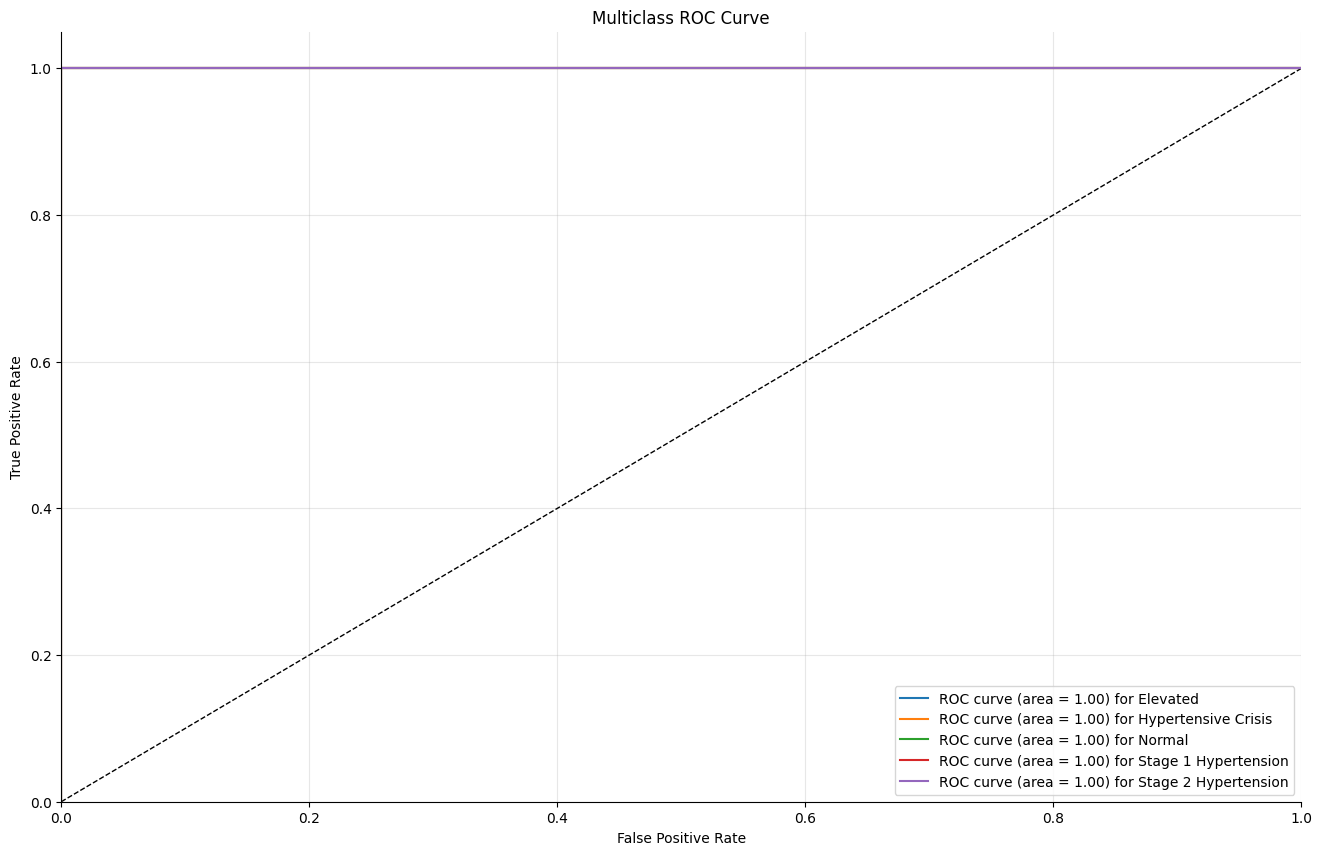

In [36]:
plot_multiclass_roc(rfc_gs_model, scaled_X_test, y_test, n_classes=5, figsize=(16, 10))

The results of these metrics show that the model clearly has an over-fitting problem. After multiple attempts to regulate the dataset the model continued to show symptoms over by-hearting the dataset. Even though the random forest classifier shows 100 % accuracy, precision ,recall and f1-score it is the least ideal model of machine learning algorithms used in this study. 